# K-means Clustering

In [1]:
# Import Libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [14]:
image = cv2.imread('Images/duomo.jpg') 

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

# Reshaping the image into a 2D array of pixels and 3 color values (RGB) 
pixel_vals = image.reshape((-1,3)) 

# Convert to float type only for supporting cv2.kmean
pixel_vals = np.float32(pixel_vals)

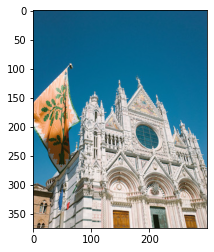

In [15]:
# Display image
plt.imshow(image)

**retval, labels, centers = cv2.kmeans(samples, nclusters(K), None, criteria, attempts, flags)**

* samples : It should be of np.float32 data type, and each feature should be put in a single column.

* nclusters(K) : Number of clusters required at end

* criteria : Iteration termination criteria. When this criteria is satisfied, algorithm iteration stops. Tuple of 3 parameters. ( type, max_iter, epsilon )

    - type of termination criteria : 3 flags
        - cv2.TERM_CRITERIA_EPS - stop the algorithm iteration if specified accuracy, epsilon, is reached. 
        - cv2.TERM_CRITERIA_MAX_ITER - stop the algorithm after the specified number of iterations, max_iter. 
        - cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.
    - max_iter - Maximum number of iterations (int)
    - epsilon - Required accuracy
    
* attempts : Flag to specify the number of times the algorithm is executed using different initial labellings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.

* flags : Specify how initial centers are taken.
    cv2.KMEANS_PP_CENTERS and cv2.KMEANS_RANDOM_CENTERS.
    
----

* retval : It is the sum of squared distance from each point to their corresponding centers.
* labels : This is the label array (i.e. labels which denotes which pixel belongs to which cluster)
* centers : This is array of centers of clusters

In [16]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

k = 10

retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) 

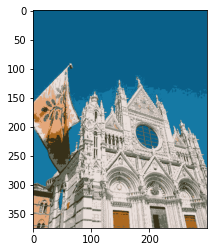

In [17]:
# convert data into 8-bit values 
centers = np.uint8(centers) 

# Mapping labels to center points( RGB Value)
segmented_data = centers[labels.flatten()] 

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape)) 

# Display image
plt.imshow(segmented_image)